In [1]:
import tensorflow as tf
import transformers

c:\Users\Joe\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.__version__

'2.10.0'

In [3]:
import numpy as np
import pandas as pd

In [4]:
from transformers import TFAutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

In [5]:
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()

In [6]:
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')

test_text_list = x_test_df['text'].values.tolist()

In [7]:
x_test_df = x_test_df['text']

In [8]:
all_data = pd.concat([x_train_df,y_train_df], axis=1)

In [9]:
all_data = all_data[['text','is_positive_sentiment']]

In [10]:
testids = np.zeros((len(x_test_df),100))
testmask = np.zeros((len(x_test_df),100))


In [11]:
xids = np.zeros((len(all_data),100))
xmask = np.zeros((len(all_data),100))

In [12]:
xids.shape

(2400, 100)

In [13]:
for i , sequence in enumerate(all_data['text']):
    tokens = tokenizer.encode_plus(sequence, max_length=100, truncation=True,
                      padding='max_length', add_special_tokens=True,
                      return_attention_mask=True, return_token_type_ids=False,
                      return_tensors='tf')
    xids[i, :], xmask[i,:] = tokens['input_ids'], tokens['attention_mask']


In [14]:
for i , sequence in enumerate(x_test_df):
    tokens = tokenizer.encode_plus(sequence, max_length=100, truncation=True,
                      padding='max_length', add_special_tokens=True,
                      return_attention_mask=True, return_token_type_ids=False,
                      return_tensors='tf')
    testids[i, :], testmask[i,:] = tokens['input_ids'], tokens['attention_mask']


In [15]:
print(xids)
print(xmask)

[[  101.  2821.  1998. ...     0.     0.     0.]
 [  101.  2008.  2028. ...     0.     0.     0.]
 [  101.  5949.  1997. ...     0.     0.     0.]
 ...
 [  101.  2572. 11283. ...     0.     0.     0.]
 [  101.  2057.  3641. ...     0.     0.     0.]
 [  101.  2326.  2001. ...     0.     0.     0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [16]:
print(testids)
print(testmask)

[[  101. 10892.  1010. ...     0.     0.     0.]
 [  101.   999.  1012. ...     0.     0.     0.]
 [  101.  2054.  1037. ...     0.     0.     0.]
 ...
 [  101.  1996.  2069. ...     0.     0.     0.]
 [  101.  2026.  2217. ...     0.     0.     0.]
 [  101.  2174.  1010. ...     0.     0.     0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [17]:
labels = all_data.is_positive_sentiment.values

In [18]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((xids, xmask, labels))

In [20]:
testdata = tf.data.Dataset.from_tensor_slices((testids,testmask))

In [21]:
testdata

<TensorSliceDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.float64, name=None), TensorSpec(shape=(100,), dtype=tf.float64, name=None))>

In [22]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([ 101., 2821., 1998., 1045., 9471., 2000., 2036., 5254., 1996.,
       6881., 3609., 3466., 2009., 2038., 2006., 2115., 3042., 1012.,
        102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.])>, <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0.

In [23]:
def map_func(input_ids, masks, labels):

    return {'inputs_ids': input_ids, 'attention_mask': masks}, labels

In [24]:
def new_map(input_ids, masks):
    return {'inputs_ids': input_ids, 'attention_mask' : masks}

In [25]:
testdata = testdata.map(new_map)

In [26]:
dataset = dataset.map(map_func)

In [27]:
testdata

<MapDataset element_spec={'inputs_ids': TensorSpec(shape=(100,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(100,), dtype=tf.float64, name=None)}>

In [28]:
for i in dataset.take(1):
    print(i)

({'inputs_ids': <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([ 101., 2821., 1998., 1045., 9471., 2000., 2036., 5254., 1996.,
       6881., 3609., 3466., 2009., 2038., 2006., 2115., 3042., 1012.,
        102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.])>, 'attention_mask': <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1

In [29]:
dataset = dataset.shuffle(100000).batch(32)

In [30]:
testdata = testdata.batch(32)

In [31]:
testdata

<BatchDataset element_spec={'inputs_ids': TensorSpec(shape=(None, 100), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 100), dtype=tf.float64, name=None)}>

In [32]:
DS_LEN = len(list(dataset))

In [33]:
DS_LEN

75

In [34]:
SPLIT = .8

train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

In [35]:
model = TFAutoModel.from_pretrained("bert-large-uncased")

Downloading: 100%|██████████| 1.47G/1.47G [01:31<00:00, 16.2MB/s]
c:\Users\Joe\miniconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Joe\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some layers from the model checkpoint at bert-large-uncased were not used when

In [36]:
input_ids = tf.keras.layers.Input(shape=(100,), name='inputs_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(100,), name='attention_mask', dtype='int32')

embeddings = model(input_ids, attention_mask = mask)[0]

#x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128))(embeddings)
x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.50)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

modelt = tf.keras.Model(inputs=[input_ids,mask], outputs = y)

modelt.layers[2].trainable = False

In [37]:
modelt.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs_ids (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  335141888   ['inputs_ids[0][0]',             
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [38]:
modelt.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [59]:
large_bert_20epochs = modelt.fit(train, validation_data=val, epochs=5)

Epoch 1/5
60/60 [==============================] - 115s 2s/step - loss: 0.1608 - accuracy: 0.9318 - val_loss: 0.0502 - val_accuracy: 0.9833
Epoch 2/5
60/60 [==============================] - 117s 2s/step - loss: 0.1720 - accuracy: 0.9302 - val_loss: 0.0456 - val_accuracy: 0.9854
Epoch 3/5
60/60 [==============================] - 115s 2s/step - loss: 0.1792 - accuracy: 0.9302 - val_loss: 0.0545 - val_accuracy: 0.9792
Epoch 4/5
60/60 [==============================] - 115s 2s/step - loss: 0.1828 - accuracy: 0.9323 - val_loss: 0.0510 - val_accuracy: 0.9812
Epoch 5/5
60/60 [==============================] - 115s 2s/step - loss: 0.1473 - accuracy: 0.9448 - val_loss: 0.0456 - val_accuracy: 0.9875


In [60]:
y_hat = modelt.predict(testdata)

19/19 [==============================] - 28s 1s/step


In [61]:
sum(y_hat)

array([303.76147], dtype=float32)

In [64]:
np.savetxt('yproba1_test.txt', y_hat)

In [47]:
large_bert_5epochs.history

{'loss': [0.5113472938537598,
  0.3058689832687378,
  0.30716678500175476,
  0.2871303856372833,
  0.25936999917030334],
 'accuracy': [0.7541666626930237,
  0.8828125,
  0.8692708611488342,
  0.8895833492279053,
  0.8973958492279053],
 'val_loss': [0.36610695719718933,
  0.24979664385318756,
  0.20176438987255096,
  0.17870689928531647,
  0.1389053612947464],
 'val_accuracy': [0.8958333134651184,
  0.9333333373069763,
  0.9541666507720947,
  0.9333333373069763,
  0.9583333134651184]}

In [46]:
large_bert_10epochs.history

{'loss': [0.2557823359966278,
  0.20119866728782654,
  0.22503328323364258,
  0.2106754034757614,
  0.19390887022018433],
 'accuracy': [0.8942708373069763,
  0.9203125238418579,
  0.9067708253860474,
  0.9161458611488342,
  0.9234374761581421],
 'val_loss': [0.12419228255748749,
  0.10641037672758102,
  0.1110009253025055,
  0.12103091180324554,
  0.08944468945264816],
 'val_accuracy': [0.9437500238418579,
  0.9604166746139526,
  0.9520833492279053,
  0.956250011920929,
  0.9729166626930237]}

In [53]:
large_bert_15epochs.history

{'loss': [0.1964070051908493,
  0.1807035505771637,
  0.1770988255739212,
  0.16364528238773346,
  0.16011841595172882],
 'accuracy': [0.9213541746139526,
  0.9255208373069763,
  0.9203125238418579,
  0.9270833134651184,
  0.9338541626930237],
 'val_loss': [0.1085747554898262,
  0.07881902158260345,
  0.05200693756341934,
  0.05487578362226486,
  0.05959884077310562],
 'val_accuracy': [0.9520833492279053,
  0.96875,
  0.9895833134651184,
  0.987500011920929,
  0.9895833134651184]}

In [62]:

large_bert_20epochs.history

{'loss': [0.16082985699176788,
  0.17200492322444916,
  0.17917422950267792,
  0.18283192813396454,
  0.14733736217021942],
 'accuracy': [0.9317708611488342,
  0.9302083253860474,
  0.9302083253860474,
  0.9322916865348816,
  0.9447916746139526],
 'val_loss': [0.05016572028398514,
  0.04556383565068245,
  0.054529670625925064,
  0.05100691318511963,
  0.04560530185699463],
 'val_accuracy': [0.9833333492279053,
  0.9854166507720947,
  0.9791666865348816,
  0.981249988079071,
  0.987500011920929]}

In [65]:
import pickle

In [63]:
with open('large_bert_20epochs.pkl','wb') as f:
    pickle.dump(large_bert_20epochs.history,f)

In [70]:
with open('large_bert_5epochs.pkl','rb') as f:
    large_bert_5epochs = pickle.load(f)

In [72]:
lb5_train = large_bert_5epochs.get('accuracy')
lb10_train = large_bert_10epochs.get('accuracy')
lb15_train = large_bert_15epochs.get('accuracy')
lb20_train = large_bert_20epochs.get('accuracy')

lb5_val = large_bert_5epochs.get('val_accuracy')
lb10_val = large_bert_10epochs.get('val_accuracy')
lb15_val = large_bert_15epochs.get('val_accuracy')
lb20_val = large_bert_20epochs.get('val_accuracy')



In [77]:
lb_val = lb5_val + lb10_val + lb15_val + lb20_val
lb_train = lb5_train + lb10_train + lb15_train + lb20_train

In [78]:
lb_val = np.array(lb_val)
lb_train = np.array(lb_train)

In [79]:
epochs = np.arange(1,21)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

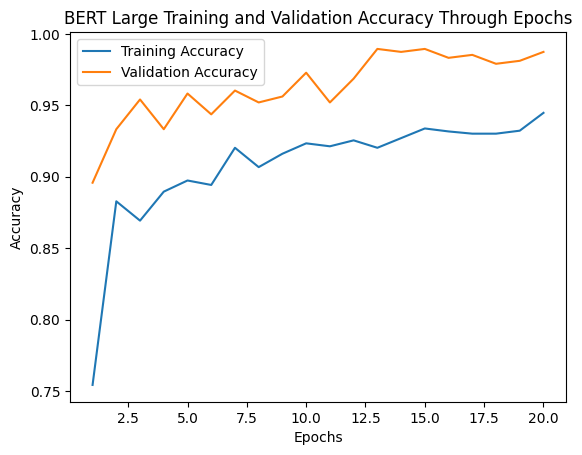

In [85]:
sns.lineplot(x=epochs, y = lb_train, errorbar=None)
sns.lineplot(x=epochs, y = lb_val, errorbar=None)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BERT Large Training and Validation Accuracy Through Epochs')
plt.legend(labels=['Training Accuracy','Validation Accuracy'])
plt.show;

In [94]:
'''with open('history_dr1.pkl','wb') as f:
    pickle.dump(history_dr1.history,f)'''

In [95]:
with open('history_dr1.pkl','rb') as f:
    history_dr1 = pickle.load(f)

In [104]:
'''with open('history_dr25.pkl','wb') as f:
    pickle.dump(history_dr25.history,f)'''

In [105]:
with open('history_dr25.pkl','rb') as f:
    history_dr25 = pickle.load(f)

In [115]:
'''with open('history_dr50.pkl','wb') as f:
    pickle.dump(history_dr50.history,f)'''

In [116]:
with open('history_dr50.pkl','rb') as f:
    history_dr50 = pickle.load(f)

In [117]:
#analyze results

In [121]:
history_dr1.get('val_accuracy')

[0.8687499761581421,
 0.8812500238418579,
 0.8729166388511658,
 0.9354166388511658,
 0.9437500238418579,
 0.9541666507720947,
 0.9666666388511658,
 0.9666666388511658,
 0.9854166507720947,
 0.9833333492279053,
 0.9791666865348816,
 0.9895833134651184,
 0.9958333373069763,
 0.9937499761581421,
 0.9854166507720947]

In [122]:
history_dr25.get('val_accuracy')

[0.7666666507720947,
 0.9083333611488342,
 0.9229166507720947,
 0.9291666746139526,
 0.956250011920929,
 0.9395833611488342,
 0.9375,
 0.9666666388511658,
 0.9624999761581421,
 0.9750000238418579,
 0.981249988079071,
 0.981249988079071,
 0.981249988079071,
 0.9916666746139526,
 0.9937499761581421]

In [123]:
history_dr50.get('val_accuracy')

[0.887499988079071,
 0.8812500238418579,
 0.8958333134651184,
 0.893750011920929,
 0.9229166507720947,
 0.9208333492279053,
 0.9312499761581421,
 0.9520833492279053,
 0.96875,
 0.949999988079071,
 0.956250011920929,
 0.9583333134651184,
 0.9583333134651184,
 0.9583333134651184,
 0.9708333611488342]